# Ames Housing Data and Kaggle Challenge

### Part 2: EDA



#### Outside Research
To gain a better understanding about the housing market and the city of Ames, I utilized the resources below:
<br><br>[Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)
- Ames, Iowa is home to Iowa State University. 
- The university makes up about half of the city's population and is the biggest employer. 
- The city has received accolades such as CNN Money's "Best Places To Live" and Bloomberg's "Cities That Have Done the Best Since the Recession"

<br>[Maximum Exposure Real Estate](https://www.maxrealestateexposure.com/appraisers-look-real-estate-appraisal/)
- This article highlights some the factors appraisers take into account when evaluating a house. Some factors include the condition of the exterior and interior, the size, and any improvements.

<br>[Ames Data Documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
- This is the data documentation that accompanies this dataset. It goes through each feature and gives an explanation of the value.

Now that I have a stronger background in housing data and a better understanding of each datatype in this set, it's time to do some exploratory analysis of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading my cleaned CSV

In [2]:
ames = pd.read_csv('../datasets/ames_housing_cleaned.csv')

In [3]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


In [4]:
ames.shape

(1969, 70)

In [5]:
ames.describe()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,1969.000000,1.969000e+03,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,...,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,1472.252920,7.125659e+08,57.079736,10005.619604,6.154901,5.583545,1971.814627,1984.434738,101.750127,454.235145,...,95.962925,47.868969,22.295582,2.699340,16.864906,2.212798,51.385983,6.212291,2007.776028,182892.861859
std,844.676789,1.886729e+08,43.009018,6710.225845,1.385860,1.105352,30.227788,20.860671,176.432970,461.013988,...,129.593082,66.291746,59.698778,25.744208,57.797094,36.444159,579.720224,2.747621,1.313282,78938.334289
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,747.000000,5.284562e+08,20.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1481.000000,5.354521e+08,50.000000,9405.000000,6.000000,5.000000,1975.000000,1993.000000,0.000000,384.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,2194.000000,9.071751e+08,70.000000,11492.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,741.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214900.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Making sure I don't have any missing values:

In [6]:
sum(ames.isna().sum())

0

Now that everything has imported correctly, it's time to do some prelim analysis on the data.

## EDA - Heatmap

First, I'll create a correlation matrix and heatmap to see what relationships are particularly strong.

In [7]:
corr_matrix = ames.corr().sort_values('saleprice')

In [8]:
corr_matrix['saleprice']

pid               -0.248731
enclosed_porch    -0.138529
overall_cond      -0.114526
kitchen_abvgr     -0.091696
ms_subclass       -0.087351
id                -0.055485
bsmt_half_bath    -0.051117
low_qual_fin_sf   -0.041789
yr_sold           -0.009412
misc_val          -0.003469
bsmtfin_sf_2       0.010424
mo_sold            0.023693
pool_area          0.029059
3ssn_porch         0.048058
bedroom_abvgr      0.129777
screen_porch       0.138853
bsmt_unf_sf        0.162273
2nd_flr_sf         0.245407
bsmt_full_bath     0.269767
half_bath          0.272200
lot_area           0.308461
open_porch_sf      0.320772
wood_deck_sf       0.322905
bsmtfin_sf_1       0.410969
fireplaces         0.463573
mas_vnr_area       0.510360
totrms_abvgrd      0.513530
year_remod/add     0.541540
full_bath          0.548034
year_built         0.567785
total_bsmt_sf      0.629267
1st_flr_sf         0.630052
garage_area        0.651016
garage_cars        0.651497
gr_liv_area        0.700919
overall_qual       0

Given the correlations above, I'm going to create a heatmap that only looks at variables that have above .5 or below -.5 correlation with the price of the home.

In [9]:
sig_corr = (corr_matrix['saleprice'] > .5) |(corr_matrix['saleprice'] < -.5)

In [10]:
sig_corr

pid                False
enclosed_porch     False
overall_cond       False
kitchen_abvgr      False
ms_subclass        False
id                 False
bsmt_half_bath     False
low_qual_fin_sf    False
yr_sold            False
misc_val           False
bsmtfin_sf_2       False
mo_sold            False
pool_area          False
3ssn_porch         False
bedroom_abvgr      False
screen_porch       False
bsmt_unf_sf        False
2nd_flr_sf         False
bsmt_full_bath     False
half_bath          False
lot_area           False
open_porch_sf      False
wood_deck_sf       False
bsmtfin_sf_1       False
fireplaces         False
mas_vnr_area        True
totrms_abvgrd       True
year_remod/add      True
full_bath           True
year_built          True
total_bsmt_sf       True
1st_flr_sf          True
garage_area         True
garage_cars         True
gr_liv_area         True
overall_qual        True
saleprice           True
Name: saleprice, dtype: bool

In [11]:
corr_matrix[sig_corr]

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
mas_vnr_area,-0.035078,-0.246443,-0.003411,0.178884,0.437791,-0.143702,0.325600,0.203938,1.000000,0.316267,...,0.160167,0.162344,-0.109864,0.010016,0.084163,0.016943,0.081746,-0.002418,-0.018803,0.510360
totrms_abvgrd,-0.003713,-0.092947,0.025550,0.234203,0.395007,-0.100488,0.135342,0.202478,0.279911,0.058197,...,0.180864,0.225786,0.004516,-0.008295,0.047779,0.065710,0.102455,0.058179,-0.029339,0.513530
year_remod/add,-0.085820,-0.169791,0.046141,0.057871,0.572608,0.026234,0.629406,1.000000,0.203938,0.152865,...,0.215322,0.258408,-0.242618,0.040376,-0.045232,-0.013392,0.003441,0.006084,0.039891,0.541540
full_bath,-0.058867,-0.178200,0.133802,0.127133,0.536383,-0.219353,0.481858,0.480964,0.242166,0.080791,...,0.185935,0.247656,-0.129908,0.029815,-0.005309,0.020319,0.002296,0.045453,0.006188,0.548034
year_built,-0.065617,-0.344994,0.039544,0.047161,0.600656,-0.383573,1.000000,0.629406,0.325600,0.272391,...,0.219397,0.205048,-0.384187,0.016046,-0.036636,0.008648,0.005013,-0.016797,-0.001264,0.567785
total_bsmt_sf,-0.038580,-0.193507,-0.240968,0.327102,0.516366,-0.206005,0.412614,0.282247,0.415140,0.525891,...,0.217314,0.257761,-0.089660,0.059676,0.081006,0.087543,0.144008,-0.004320,-0.000091,0.629267
1st_flr_sf,-0.030703,-0.156929,-0.247643,0.367446,0.498058,-0.162469,0.332764,0.251367,0.402634,0.475852,...,0.233890,0.242067,-0.049693,0.069106,0.090820,0.124471,0.150587,0.022147,-0.001365,0.630052
garage_area,-0.044478,-0.194996,-0.106435,0.262778,0.569528,-0.152851,0.488097,0.397660,0.384791,0.329226,...,0.242097,0.237409,-0.110374,0.044258,0.071948,0.028663,0.041025,0.002789,-0.003315,0.651016
garage_cars,-0.049239,-0.222513,-0.048483,0.212682,0.597672,-0.181396,0.545316,0.444428,0.362354,0.256515,...,0.238550,0.206697,-0.136437,0.028439,0.054370,0.000138,0.009458,0.015390,-0.008806,0.651497
gr_liv_area,-0.024961,-0.118252,0.067234,0.319781,0.575738,-0.122764,0.255746,0.317959,0.392846,0.213520,...,0.268948,0.335579,-0.010104,0.024559,0.106241,0.113751,0.119561,0.051306,-0.015917,0.700919


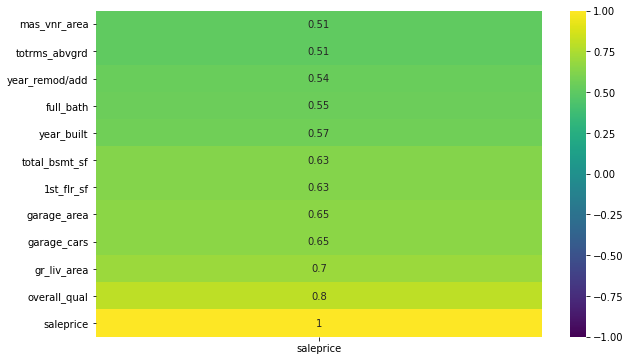

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[sig_corr][['saleprice']], annot=True,cmap='viridis', vmin=-1, vmax=1)
plt.savefig('../plots/heatmap.png', dpi=235)

This correlation only looks at the variables that have a strong positive (above .5) or a strong negative (less than -.5) correlation with the sale price. In the aspects I looked at, there were actually no variables with correlation to prices under -.5. 
The heatmap above highlights several independent variables that could be strong predictors of the sale price: overall_qual, gr_liv_area, garage_cars, garage_area, 1st_flr_sf. I'll make sure to try these out in my model.

## EDA - Barcharts

Now to take a look at some of the categorial data, I'm going to create several barcharts that compare different categories to see if any of them lean one way or another for the price.

1. Price vs Zone

In [13]:
x_mszone = sorted(set(ames['ms_zoning']))

In [14]:
print(x_mszone)

['C (all)', 'FV', 'RH', 'RL', 'RM']


In [15]:
y_mszone = ames.groupby(ames['ms_zoning'])['saleprice'].mean()

In [16]:
print(y_mszone)

ms_zoning
C (all)     79473.222222
FV         218634.172043
RH         148859.571429
RL         192848.652570
RM         129837.576547
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

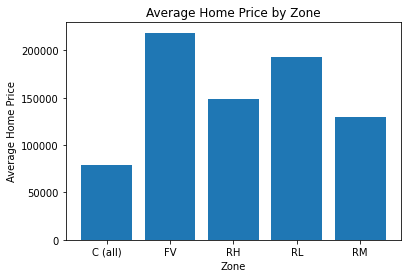

In [17]:
plt.bar(x_mszone, y_mszone)
plt.title('Average Home Price by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Home Price')

This barchart shows the difference in average home price by zone. There does seem to be some variation between categories that would be useful to capture in the model, particularly between C(all) and FV.

2. Price vs Building Type

['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'] bldg_type
1Fam      186121.105904
2fmCon    125114.204545
Duplex    151622.745455
Twnhs     133100.000000
TwnhsE    198043.620253
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

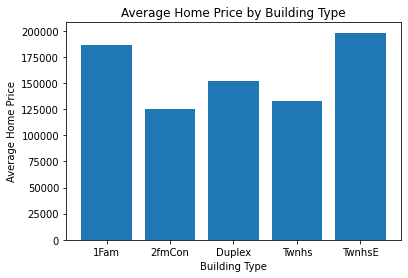

In [18]:
x_bldtype = sorted(set(ames['bldg_type']))
y_bldtype = ames.groupby(ames['bldg_type'])['saleprice'].mean()
print(x_bldtype, y_bldtype)
plt.bar(x_bldtype, y_bldtype)
plt.title('Average Home Price by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average Home Price')

Similar to the one above, this graphs looks at the average home price across the different types of buildings. This could also be a good category to dummy out for my model because there is variance.

3. Price vs House Style

['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'] house_style
1.5Fin    137155.511737
1.5Unf    112466.666667
1Story    182195.931275
2.5Fin    243666.666667
2.5Unf    191785.714286
2Story    207179.939446
SFoyer    148340.734694
SLvl      166257.043011
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

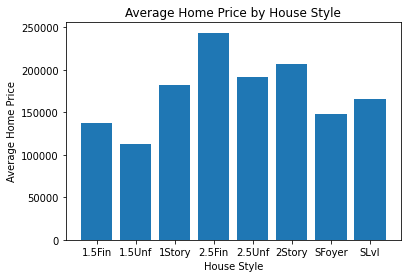

In [19]:
x_house = sorted(set(ames['house_style']))
y_house = ames.groupby(ames['house_style'])['saleprice'].mean()
print(x_house, y_house)
plt.bar(x_house, y_house)
plt.title('Average Home Price by House Style')
plt.xlabel('House Style')
plt.ylabel('Average Home Price')

Another plot to show the average home price for a certain category. In this case, it looks like homes that are 2.5 stories and finished have the higest average while those that are 1.5  stories and unfinished have the lowest. This difference in price would be great to capture in my model.

4. Price vs Functional Category

['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ'] functional
Maj1    159695.454545
Maj2     90333.333333
Min1    160066.447368
Min2    156943.243243
Mod     165839.272727
Sal      50000.000000
Sev      95750.000000
Typ     184685.748380
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

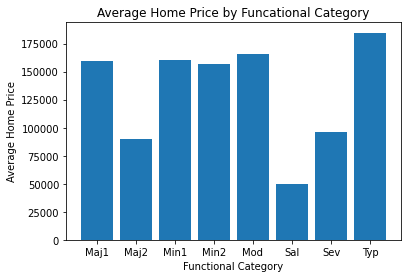

In [20]:
x_func = sorted(set(ames['functional']))
y_func = ames.groupby(ames['functional'])['saleprice'].mean()
print(x_func, y_func)
plt.bar(x_func, y_func)
plt.title('Average Home Price by Funcational Category')
plt.xlabel('Functional Category')
plt.ylabel('Average Home Price')

The barchart above shows that many of the categories have similar average prices but a few are much lower such as "Sal" and "Maj 2". This could be a good indication of price to include via dummy categories.

### Quality and Conditions
A few catagories are paired with quality and condition, in the barcharts below I'll explore what the distinction is.

Exterior Quality and Condition

['Ex', 'Fa', 'Gd', 'TA'] exter_qual
Ex    373328.562500
Fa     98627.545455
Gd    231064.853731
TA    144750.628237
Name: saleprice, dtype: float64
['Ex', 'Fa', 'Gd', 'Po', 'TA'] exter_cond
Ex    236263.857143
Fa    106987.545455
Gd    168587.089202
Po     76500.000000
TA    186484.269953
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

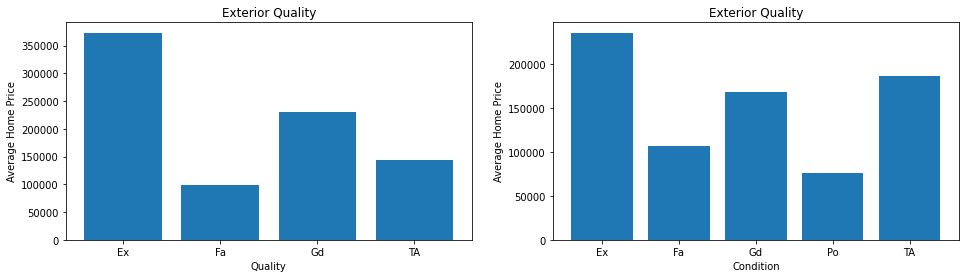

In [21]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
x_extq = sorted(set(ames['exter_qual']))
y_extq = ames.groupby(ames['exter_qual'])['saleprice'].mean()
print(x_extq, y_extq)
plt.bar(x_extq, y_extq)
plt.title('Exterior Quality')
plt.xlabel('Quality')
plt.ylabel('Average Home Price')

plt.subplot(1, 2, 2)
x_cond = sorted(set(ames['exter_cond']))
y_cond = ames.groupby(ames['exter_cond'])['saleprice'].mean()
print(x_cond, y_cond)
plt.bar(x_cond, y_cond)
plt.title('Exterior Condition')
plt.title('Exterior Quality')
plt.xlabel('Condition')
plt.ylabel('Average Home Price')

Upon comparing the quality and condition categories, it looks like they are on the same scale. Per the data documentation, their definition vary slightly but it looks like quality has more variance in average price than condition. Because of this big difference, I'm going to include this in my model as well.

Basement Quality and Condition

['Ex', 'Fa', 'Gd', 'Po', 'TA'] bsmt_qual
Ex    330190.689266
Fa    107752.166667
Gd    202543.221302
Po     89000.000000
TA    139920.023702
Name: saleprice, dtype: float64
['Ex', 'Fa', 'Gd', 'Po', 'TA'] bsmt_cond
Ex    195000.000000
Fa    118629.076923
Gd    219901.954023
Po    124063.200000
TA    183564.604201
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

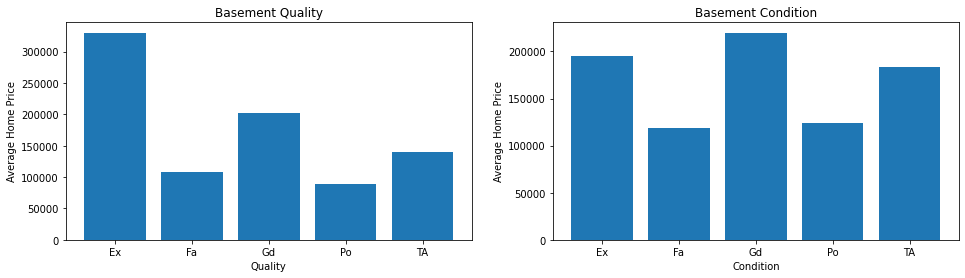

In [22]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
x_baseq = sorted(set(ames['bsmt_qual']))
y_baseq = ames.groupby(ames['bsmt_qual'])['saleprice'].mean()
print(x_baseq, y_baseq)
plt.bar(x_baseq, y_baseq)
plt.title('Basement Quality')
plt.xlabel('Quality')
plt.ylabel('Average Home Price')


plt.subplot(1, 2, 2)
x_basec = sorted(set(ames['bsmt_cond']))
y_basec = ames.groupby(ames['bsmt_cond'])['saleprice'].mean()
print(x_basec, y_basec)
plt.bar(x_basec, y_basec)
plt.title('Basement Condition')
plt.xlabel('Condition')
plt.ylabel('Average Home Price')

The same results are evident here: quality has more variance than condition for basements.

Overall Quality and Condition

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] overall_qual
1      61000.000000
2      45020.000000
3      76022.619048
4     109479.014085
5     134988.059150
6     162863.810379
7     203525.840095
8     271443.729167
9     370197.376623
10    415232.772727
Name: saleprice, dtype: float64
[1, 2, 3, 4, 5, 6, 7, 8, 9] overall_cond
1     59625.000000
2     65657.800000
3     99131.806452
4    118392.770492
5    208885.193548
6    149259.505556
7    156146.996183
8    155913.366337
9    198177.586207
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

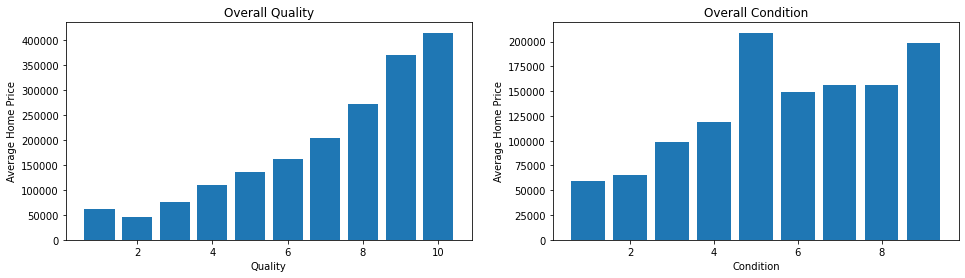

In [23]:
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
x_qual = sorted(set(ames['overall_qual']))
y_qual = ames.groupby(ames['overall_qual'])['saleprice'].mean()
print(x_qual, y_qual)
plt.bar(x_qual, y_qual)
plt.title('Overall Quality')
plt.xlabel('Quality')
plt.ylabel('Average Home Price')

plt.subplot(1, 2, 2)
x_condi = sorted(set(ames['overall_cond']))
y_condi = ames.groupby(ames['overall_cond'])['saleprice'].mean()
print(x_condi, y_condi)
plt.bar(x_condi, y_condi)
plt.title('Overall Condition')
plt.xlabel('Condition')
plt.ylabel('Average Home Price')

Overall quality vs condition definitely showcases the distinction between the two. There's definitely a stronger linear relationship between price and quality than price and condition. This also makes sense because overall quality had the highest correlation of any variable with price.

Kitchen Quality

['Ex', 'Fa', 'Gd', 'TA'] kitchen_qual
Ex    336499.643836
Fa    107367.690476
Gd    212072.396154
TA    140920.264735
Name: saleprice, dtype: float64


Text(0, 0.5, 'Average Home Price')

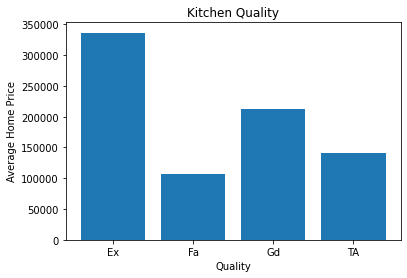

In [24]:
x_kqual = sorted(set(ames['kitchen_qual']))
y_kqual = ames.groupby(ames['kitchen_qual'])['saleprice'].mean()
print(x_kqual, y_kqual)
plt.bar(x_kqual, y_kqual)
plt.title('Kitchen Quality')
plt.xlabel('Quality')
plt.ylabel('Average Home Price')

Finally, the kitchen category had no column for condition, just quality. In the chart above we can see that having an excellent kitchen has the potential to really impact the price over a typical or fair kitchen.

## EDA: Scatterplots

Now I'm going to use scatter plots to examine if there's a relationship between some of the numerical data and sale price.

Pool Area

Text(0, 0.5, 'Sale Price')

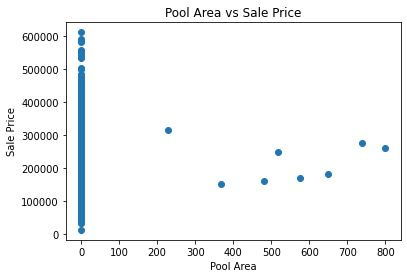

In [25]:
plt.scatter(ames['pool_area'], ames['saleprice'])
plt.title('Pool Area vs Sale Price')
plt.xlabel('Pool Area')
plt.ylabel('Sale Price')

The vast majority of houses don't have a pool (aka 0 sq ft for pool area). For those that do have a pool, there doesn't seem to be a correlation between pool area and sale price.

Year Built

Text(0, 0.5, 'Sale Price')

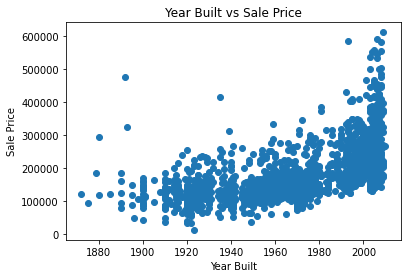

In [26]:
plt.scatter(ames['year_built'], ames['saleprice'])
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

Per the scatter plot above, the year the house was build seems to have somewhat strong relationship with the sale price.

Below, I'm engineering a simple feature to see if remodeling has a impact on the house. I subtracting the columns as houses with no remodel will come out at zero.

In [27]:
ames['remodel'] = ames['year_remod/add'] - ames['year_built']

Text(0, 0.5, 'Sale Price')

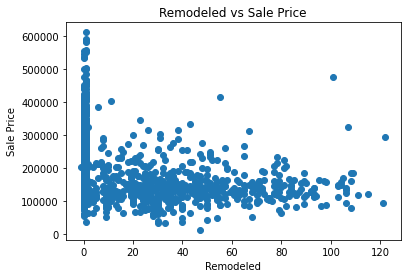

In [28]:
plt.scatter(ames['remodel'], ames['saleprice'])
plt.title('Remodeled vs Sale Price')
plt.xlabel('Remodeled')
plt.ylabel('Sale Price')

As we can see, there are some houses that have not been remodeled that are at both ends of the spectrum in terms of price. From there, the older the remodel gets, the more the price decreases.

Text(0, 0.5, 'Sale Price')

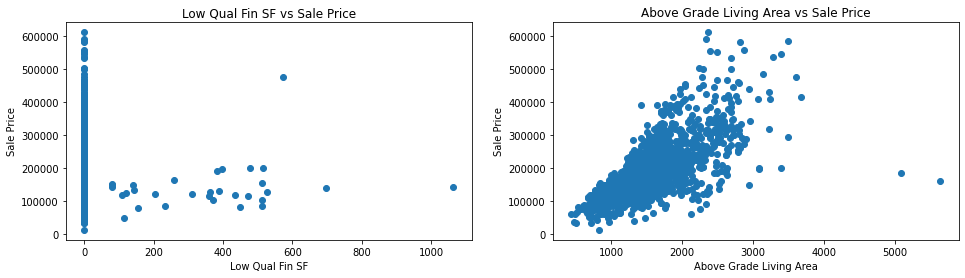

In [29]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.scatter(ames['low_qual_fin_sf'], ames['saleprice'])
plt.title('Low Qual Fin SF vs Sale Price')
plt.xlabel('Low Qual Fin SF')
plt.ylabel('Sale Price')

plt.subplot(122)
plt.scatter(ames['gr_liv_area'], ames['saleprice'])
plt.title('Above Grade Living Area vs Sale Price')
plt.xlabel('Above Grade Living Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

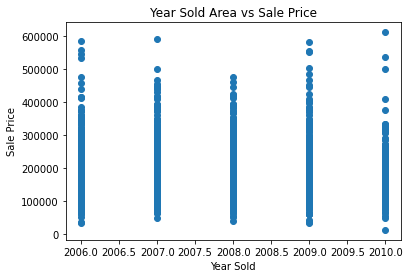

In [30]:
plt.scatter(ames['yr_sold'], ames['saleprice'])
plt.title('Year Sold Area vs Sale Price')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')

The year sold on it's own doesn't have much of a correlation with price.

After doing all the analysis and visulation above, I have a strong idea of what features I want to start working with for my model. In the next notebook, I start to build those out. As I create new iterations of the model, I will perform some additional EDA but that is all in the context of my modeling notebook.